---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

In [1]:
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [2]:
#EDA에 사용할 라이브러리를 import 하세요

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as spst
import matplotlib.pyplot as plt

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [3]:
#이번 프로젝트에서 분석할 데이터를 불러오세요

bike_seoul = pd.read_csv('sbikedata.csv', sep=',', index_col=0, encoding='UTF-8')

### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

x(독립변수), y(종속변수) <br>
y와 x의 관련 여부 -> 가설설정 <br>

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

x: 온도 <br>
y: 따릉이 대여량 <br>

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : precipitation 여부와 따릉이

    ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.  
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 2 : ozone 수치와 따릉이

    ㅇ 귀무가설: ozone 수치와 따릉이간에는 연관성이 없다.  
    ㅇ 대립가설 : ozone 수치와 따릉이 대여량 간에는 연관성이 있다.


- 가설 3 : visibility 수치와 따릉이

- 가설 4 : PM2.5 수치와 따릉이

- 가설 5 : windspeed 수치와 따릉이

- 가설 6 : count 값과 따릉이

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [4]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [5]:
#변수의 자료형을 확인해보세요.
bike_seoul.dtypes

hour               int64
PM10             float64
PM2.5            float64
ozone            float64
temperature      float64
precipitation      int64
windspeed        float64
humidity           int64
visibility         int64
count              int64
dtype: object

3. 변수의 결측치 존재 여부 및 조치방안

In [6]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_seoul.isnull().sum()

hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

In [7]:
bike_seoul = bike_seoul.dropna(axis=0)

In [8]:
bike_seoul.isnull().sum()

hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

4. 변수의 기초 통계량 확인

In [9]:
#변수의 기초 통계량을 확인해보세요.

In [10]:
bike_seoul['ozone'].max()

0.137

In [10]:
bike_seoul.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.00000,5670.000000,5670.000000
mean,11.495238,31.580423,15.332451,0.031793,19.418959,0.075309,2.231217,68.61552,1763.198765,215.869841
std,6.953965,42.811991,12.860270,0.018250,7.455268,0.263912,1.046569,17.28755,484.862120,186.974342
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.00000,60.000000,1.000000
25%,5.000000,16.000000,7.000000,0.019000,14.200000,0.000000,1.500000,56.00000,1943.000000,53.000000
50%,11.000000,24.500000,13.000000,0.031000,20.500000,0.000000,2.150000,70.00000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.00000,2000.000000,317.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.00000,2000.000000,1746.000000


In [11]:
bike_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670 entries, 2021-04-01 to 2021-11-30
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           5670 non-null   int64  
 1   PM10           5670 non-null   float64
 2   PM2.5          5670 non-null   float64
 3   ozone          5670 non-null   float64
 4   temperature    5670 non-null   float64
 5   precipitation  5670 non-null   int64  
 6   windspeed      5670 non-null   float64
 7   humidity       5670 non-null   int64  
 8   visibility     5670 non-null   int64  
 9   count          5670 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 487.3+ KB


In [12]:
bike_seoul.head()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
date,,,,,,,,,,
2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [13]:
bike_seoul.tail()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
date,,,,,,,,,,
2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


5. 변수의 분포 확인

In [14]:
#변수의 분포를 확인해보세요.

In [15]:
bike_seoul['hour'].value_counts()

1     240
21    240
7     240
19    239
23    239
22    239
20    239
0     239
8     239
9     238
5     238
2     237
17    237
18    237
6     237
4     237
3     237
10    235
16    235
15    233
14    232
11    228
12    228
13    227
Name: hour, dtype: int64

NameError: name 'bars' is not defined

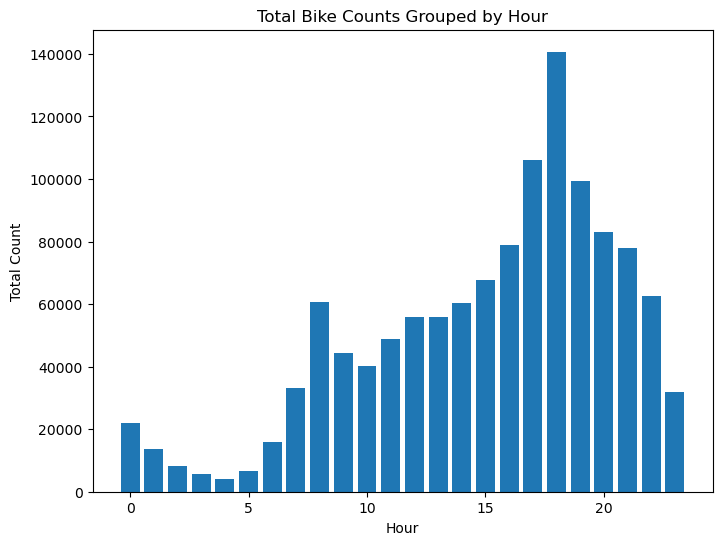

In [16]:
x = bike_seoul['hour'].tolist()
y = bike_seoul['count'].tolist()

# 시간 별 count의 합계
grouped = bike_seoul.groupby('hour')['count'].sum()
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(grouped.index, grouped.values)
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.title('Total Bike Counts Grouped by Hour')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha = 'center',va='bottom',size=3)

    
plt.show()

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
hour,5670.0,11.495238,6.953965,0.0,5.0,11.0,18.0,23.0


<< 그래프 >>


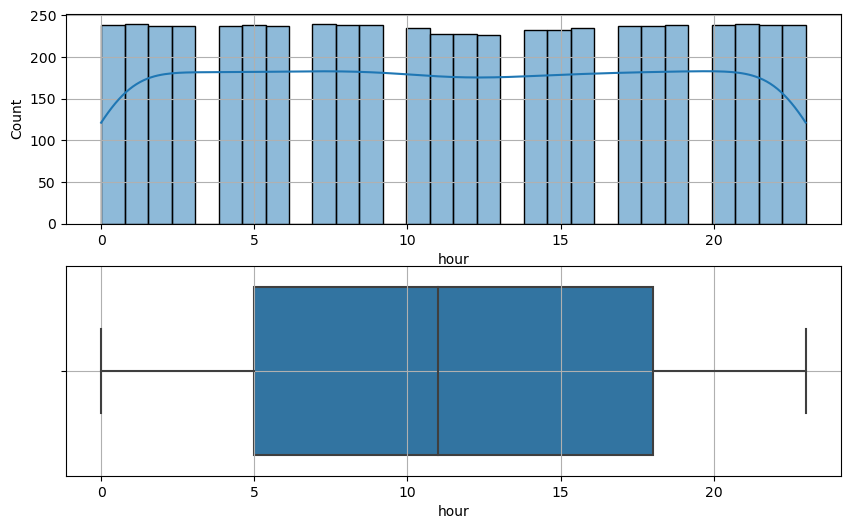

In [104]:
eda_1_num(bike_seoul,'hour')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [1]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [2]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [ ]:
bike_seoul['temperature'].isnull().sum()

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [ ]:
bike_seoul['temperature'].info

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.
bike_seoul['temperature'].value_counts()

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
temperature,5670.0,19.418959,7.455268,-3.5,14.2,20.5,24.9,36.3


<< 그래프 >>


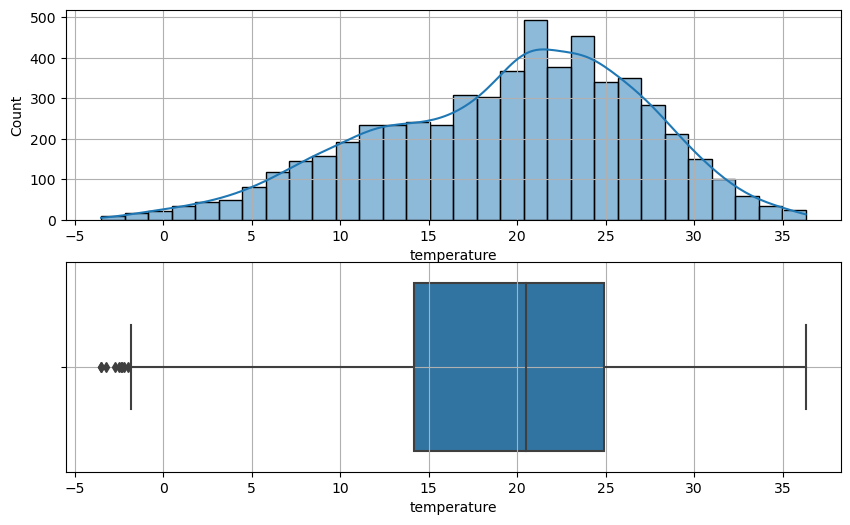

In [17]:
eda_1_num(bike_seoul,'temperature')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [18]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [19]:
bike_seoul['precipitation'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [20]:
#변수의 분포를 확인해보세요.
bike_seoul['precipitation'].value_counts()

0    5243
1     427
Name: precipitation, dtype: int64

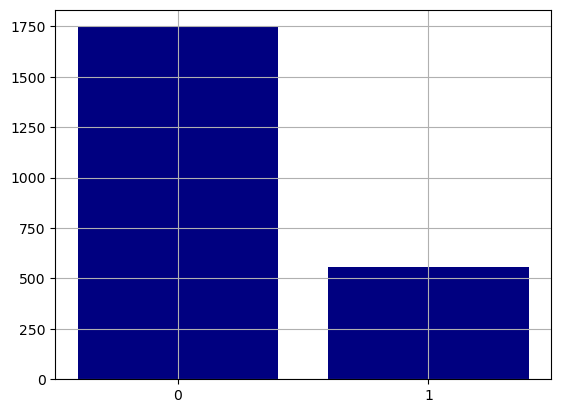

In [21]:
#plt.figure(figsize = (4, 5))
plt.bar(bike_seoul['precipitation'], bike_seoul['count'], color = 'navy')
plt.xticks([0, 1])
plt.grid()
plt.show()

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
precipitation,5670.0,0.075309,0.263912,0.0,0.0,0.0,0.0,1.0


<< 그래프 >>


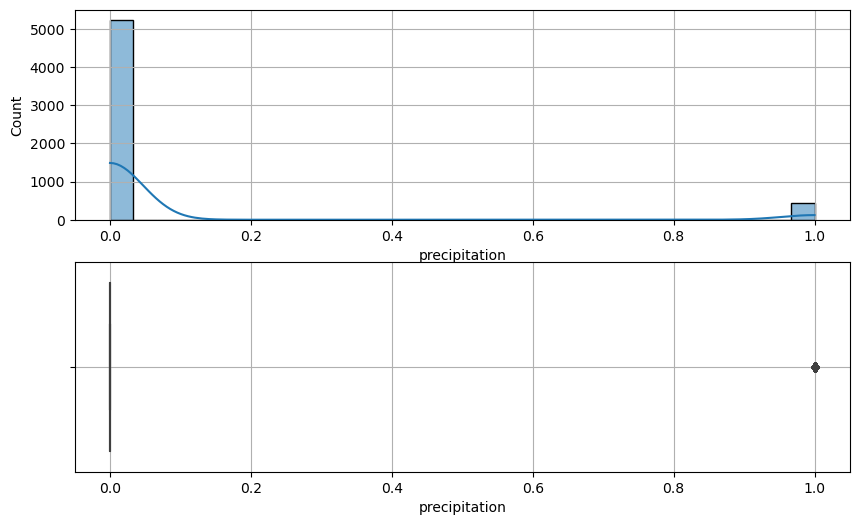

In [22]:
eda_1_num(bike_seoul,'precipitation')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [23]:
bike_seoul['windspeed'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [24]:
#변수의 기초 통계량을 확인해보세요
bike_seoul['windspeed'].value_counts()

2.3    250
2.2    244
1.9    232
2.1    231
1.7    227
      ... 
8.1      1
6.9      1
5.7      1
5.8      1
6.8      1
Name: windspeed, Length: 70, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
windspeed,5670.0,2.231217,1.046569,0.0,1.5,2.15,2.8,8.3


<< 그래프 >>


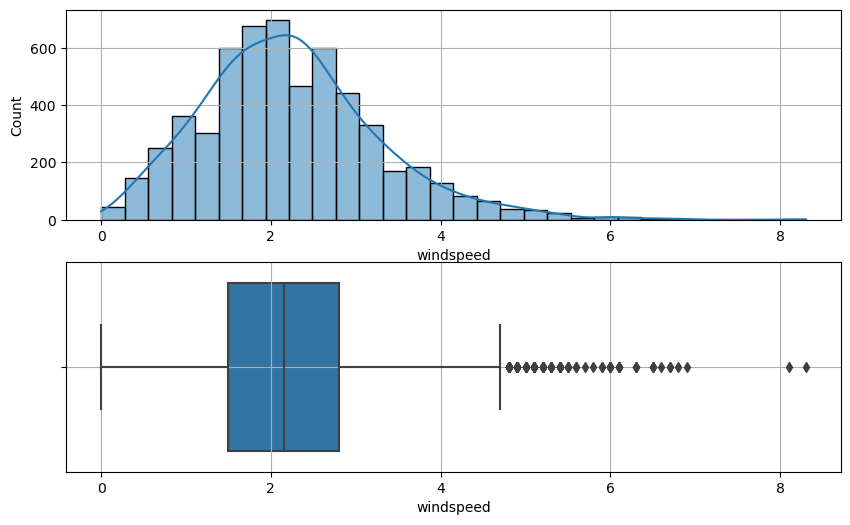

In [25]:
eda_1_num(bike_seoul,'windspeed')

5. 변수의 분포 확인

In [26]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [27]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [28]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [29]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [30]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [31]:
bike_seoul['humidity'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [32]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [33]:
#변수의 분포를 확인해보세요.
bike_seoul['humidity'].value_counts()

70    141
76    137
75    125
69    124
63    124
     ... 
24      4
20      3
22      2
21      2
19      1
Name: humidity, Length: 82, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
humidity,5670.0,68.61552,17.28755,19.0,56.0,70.0,82.0,100.0


<< 그래프 >>


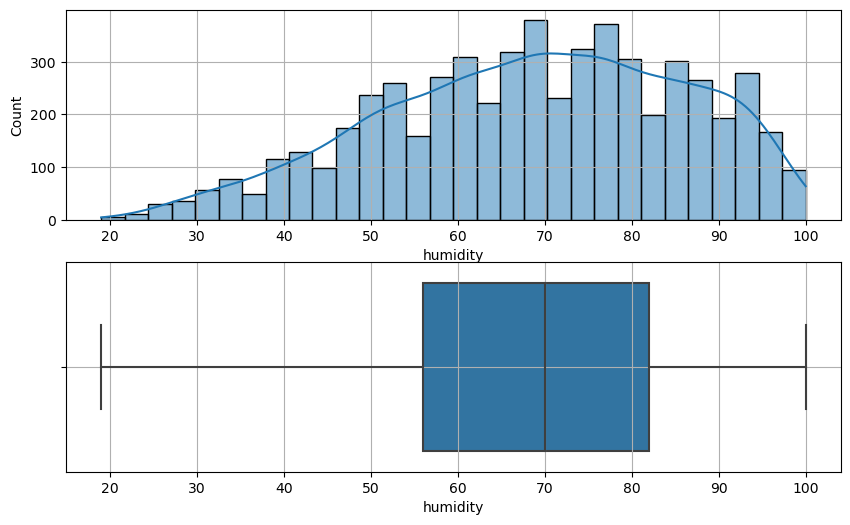

In [34]:
eda_1_num(bike_seoul,'humidity')

6. 위 정보로 부터 파악한 내용 정리

In [35]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [36]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [37]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [38]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [39]:
bike_seoul['visibility'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [40]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [41]:
#변수의 분포를 확인해보세요.
bike_seoul['visibility'].value_counts()

2000    4116
1996       8
1984       7
1992       7
1994       6
        ... 
359        1
871        1
269        1
1880       1
1250       1
Name: visibility, Length: 1013, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
visibility,5670.0,1763.198765,484.86212,60.0,1943.0,2000.0,2000.0,2000.0


<< 그래프 >>


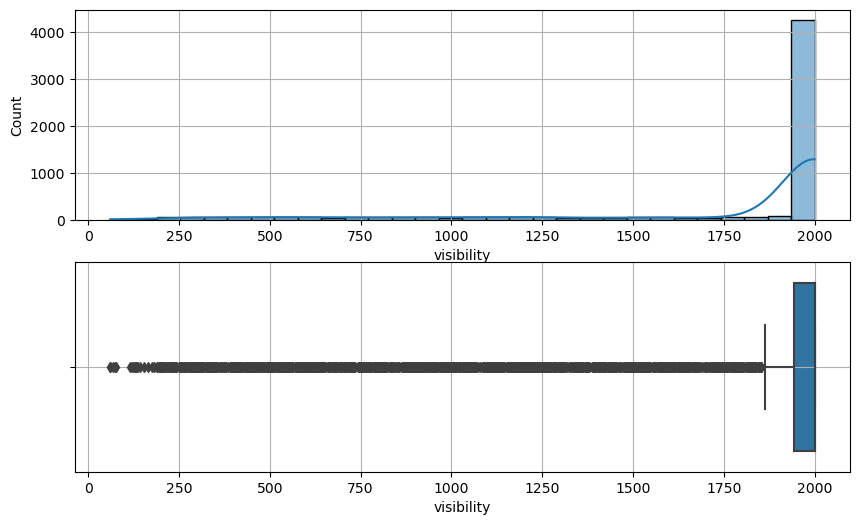

In [42]:
eda_1_num(bike_seoul,'visibility')

6. 위 정보로 부터 파악한 내용 정리

In [43]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [44]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [45]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [46]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [47]:
bike_seoul['ozone'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [48]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [49]:
#변수의 분포를 확인해보세요.
bike_seoul['ozone'].value_counts()

0.002    177
0.031    170
0.034    161
0.032    160
0.029    160
        ... 
0.137      1
0.110      1
0.106      1
0.116      1
0.115      1
Name: ozone, Length: 109, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ozone,5670.0,0.031793,0.01825,0.001,0.019,0.031,0.041,0.137


<< 그래프 >>


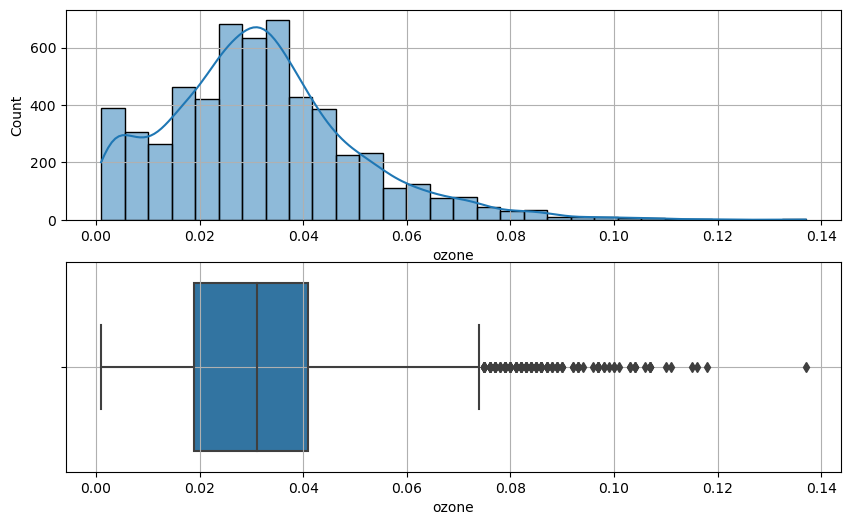

In [50]:
eda_1_num(bike_seoul,'ozone')

6. 위 정보로 부터 파악한 내용 정리

In [51]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [52]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [53]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [54]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [55]:
bike_seoul['PM10'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [56]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [57]:
#변수의 분포를 확인해보세요.
bike_seoul['PM10'].value_counts()

18.0     181
22.0     177
20.0     177
23.0     173
19.0     172
        ... 
551.0      1
582.0      1
590.0      1
615.0      1
121.0      1
Name: PM10, Length: 180, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
PM10,5670.0,31.580423,42.811991,3.0,16.0,24.5,37.0,827.0


<< 그래프 >>


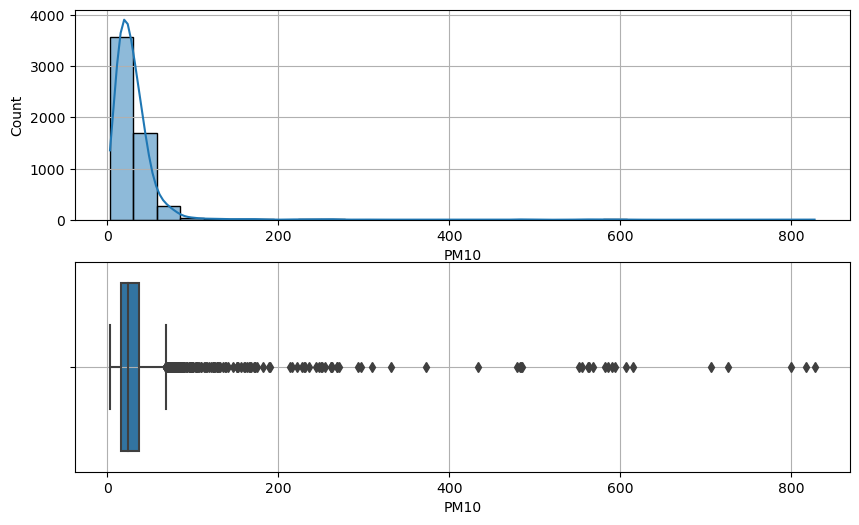

In [58]:
eda_1_num(bike_seoul,'PM10')

6. 위 정보로 부터 파악한 내용 정리

In [59]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [60]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [61]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [62]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [63]:
bike_seoul['PM2.5'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [64]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [65]:
#변수의 분포를 확인해보세요.
bike_seoul['PM2.5'].value_counts()

5.0      264
7.0      258
11.0     257
13.0     255
12.0     253
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
95.0       1
Name: PM2.5, Length: 102, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
PM2.5,5670.0,15.332451,12.86027,1.0,7.0,13.0,20.0,125.0


<< 그래프 >>


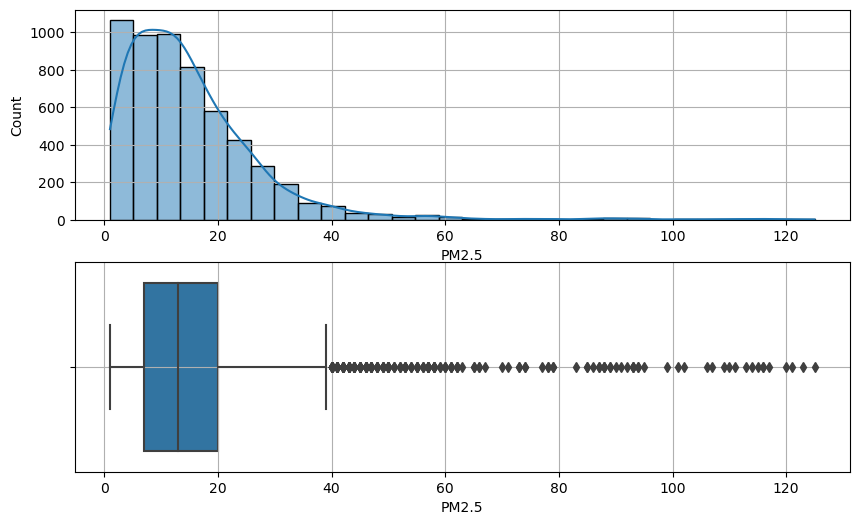

In [66]:
eda_1_num(bike_seoul,'PM2.5')

6. 위 정보로 부터 파악한 내용 정리

In [67]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [68]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [69]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [70]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [71]:
bike_seoul['count'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [72]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [73]:
#변수의 분포를 확인해보세요.
bike_seoul['count'].value_counts()

20     45
16     44
21     43
25     43
15     43
       ..
717     1
641     1
568     1
775     1
519     1
Name: count, Length: 756, dtype: int64

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
count,5670.0,215.869841,186.974342,1.0,53.0,186.0,317.0,1746.0


<< 그래프 >>


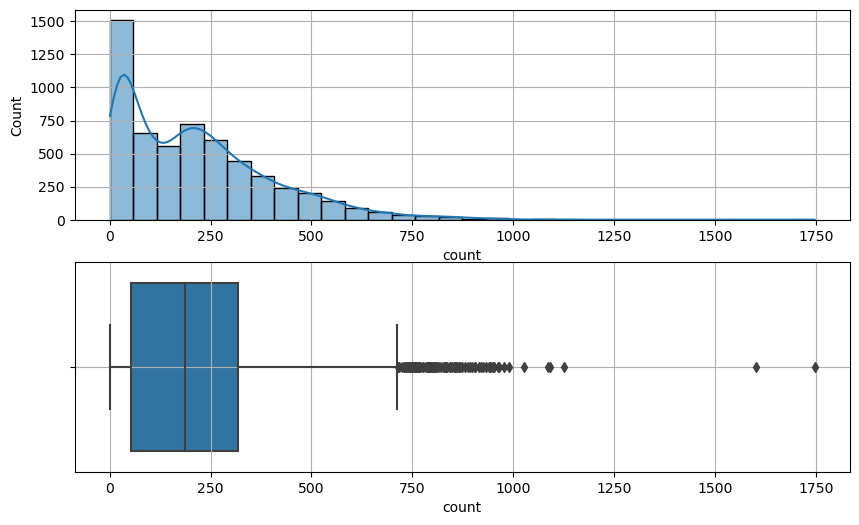

In [74]:
eda_1_num(bike_seoul,'count')

6. 위 정보로 부터 파악한 내용 정리

In [75]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [76]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [77]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

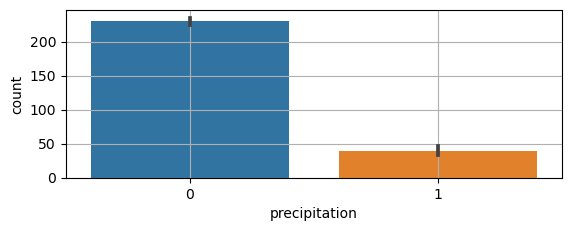

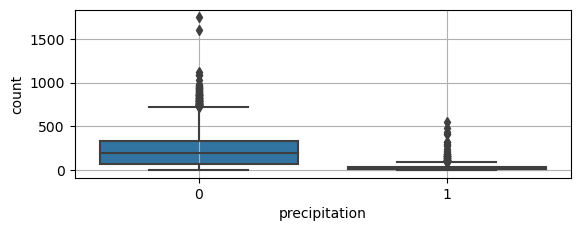

In [78]:
plt.subplot(2,1,1)
sns.barplot(x='precipitation', y = 'count', data = bike_seoul)
plt.grid()
plt.show()


plt.subplot(2,1,2)
sns.boxplot(x='precipitation', y = 'count', data = bike_seoul)
plt.grid()
plt.show()

2. 수치화 : t-test, anova

-  t-test

In [79]:
not_rain = bike_seoul.loc[bike_seoul['precipitation']==0, 'count']
rain = bike_seoul.loc[bike_seoul['precipitation']==1, 'count']

spst.ttest_ind(not_rain, rain)

Ttest_indResult(statistic=20.998879971563788, pvalue=2.428442706503082e-94)

- anova

In [80]:
spst.f_oneway(not_rain, rain)

F_onewayResult(statistic=440.9529600601429, pvalue=2.428442706510851e-94)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [81]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

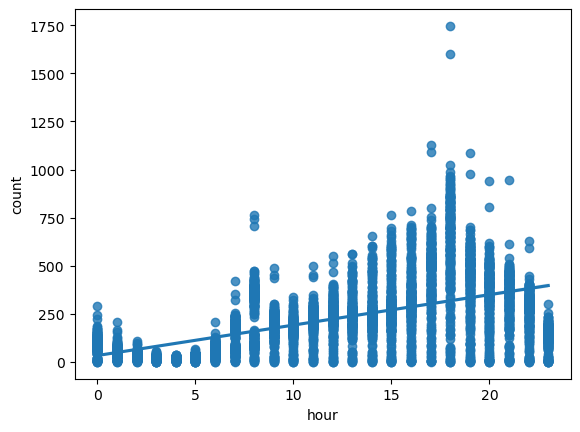

In [82]:
# plt.figure(figsize=(10, 10))
sns.regplot(x='hour', y='count', data = bike_seoul)
plt.show()

2. 수치화 : 상관분석

In [83]:
spst.pearsonr(bike_seoul['hour'], bike_seoul['count'])

PearsonRResult(statistic=0.587558535914158, pvalue=0.0)

3. 온도 데이터와 따릉이 대여량간 분석

In [84]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

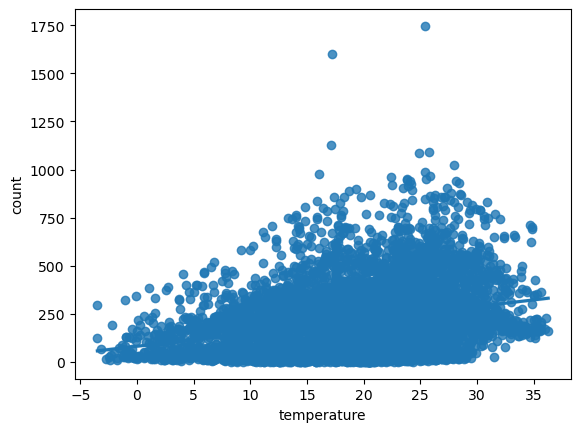

In [85]:
# plt.figure(figsize=(10, 10))
sns.regplot(x='temperature', y='count', data = bike_seoul)
plt.show()

4. 풍속 데이터와 따릉이 대여량간 분석

In [86]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

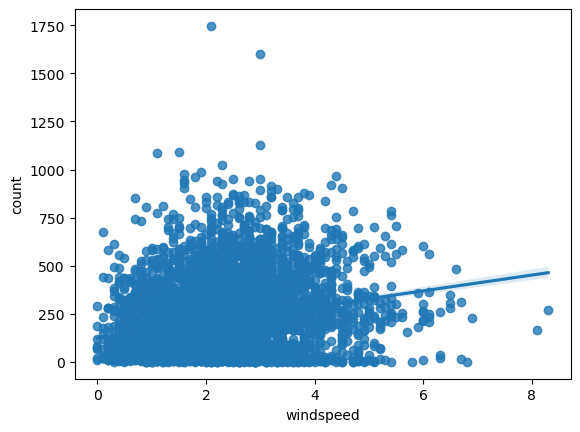

In [87]:
sns.regplot(x='windspeed', y='count', data = bike_seoul)
plt.show()

2. 수치화 : 상관분석

In [88]:
spst.pearsonr(bike_seoul['windspeed'], bike_seoul['count'])

PearsonRResult(statistic=0.22922151636418522, pvalue=1.7134562728086756e-68)

5. 습도 데이터와 따릉이 대여량간 분석

In [89]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

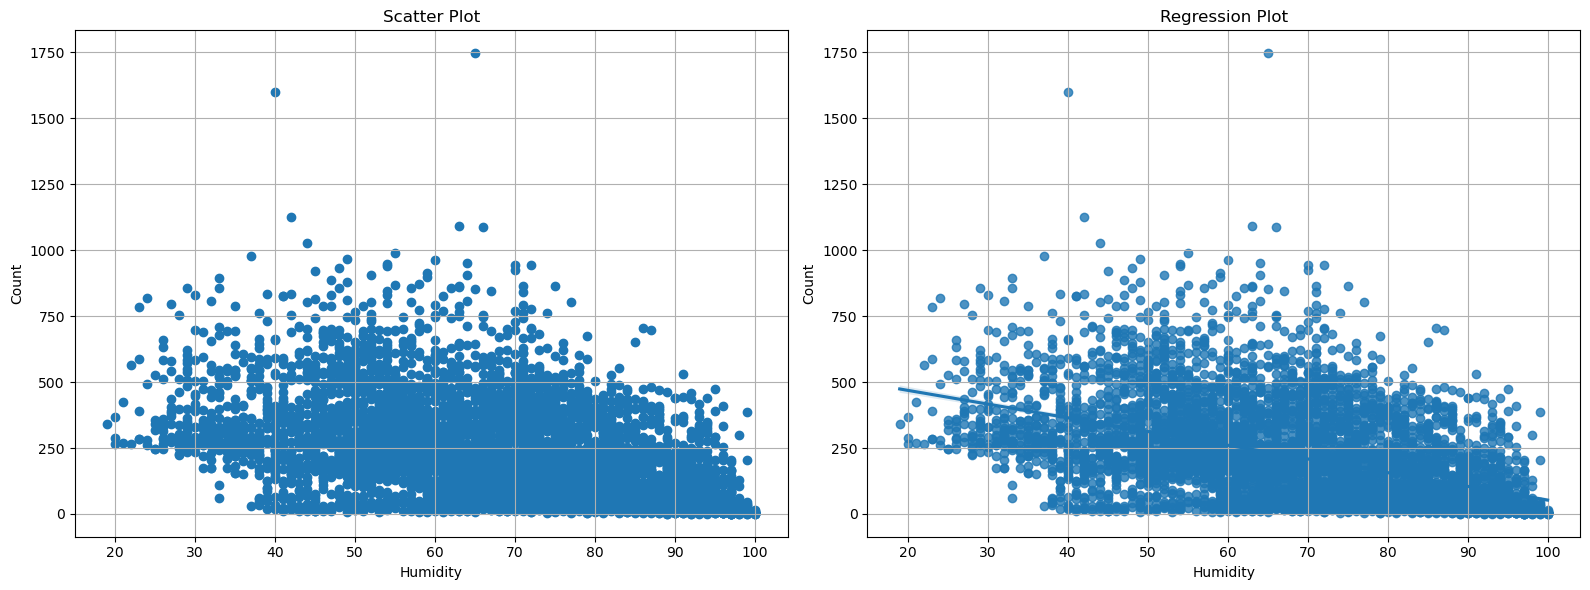

In [114]:
plt.figure(figsize=(16, 6))  # 전체 그래프 영역의 크기 설정

# 첫 번째 그래프
plt.subplot(1, 2, 1)
plt.scatter(x='humidity', y='count', data=bike_seoul)
plt.title('Scatter Plot')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.grid()

# 두 번째 그래프
plt.subplot(1, 2, 2)
sns.regplot(x='humidity', y='count', data=bike_seoul)
plt.title('Regression Plot')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.grid()
plt.tight_layout()  # 그래프들 간의 간격을 조정
plt.show()

2. 수치화 : 상관분석

In [91]:
spst.pearsonr(bike_seoul['humidity'], bike_seoul['count'])

PearsonRResult(statistic=-0.48074217482491177, pvalue=0.0)

6. 시정 데이터와 따릉이 대여량간 분석

In [92]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

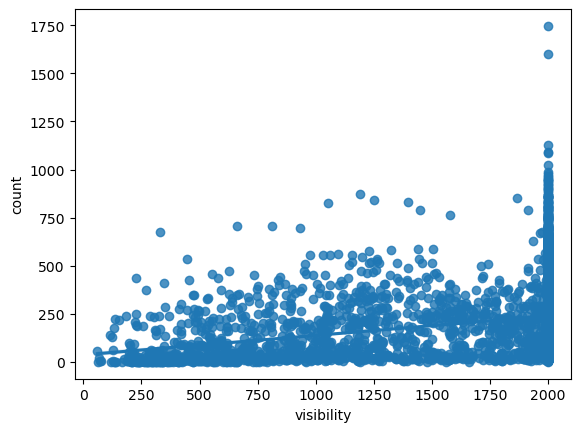

In [93]:
sns.regplot(x='visibility', y='count', data = bike_seoul)
plt.show()

2. 수치화 : 상관분석

In [94]:
spst.pearsonr(bike_seoul['visibility'], bike_seoul['count'])

PearsonRResult(statistic=0.26207314766928064, pvalue=1.069132820550618e-89)

7. 오존 데이터와 따릉이 대여량간 분석

In [95]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

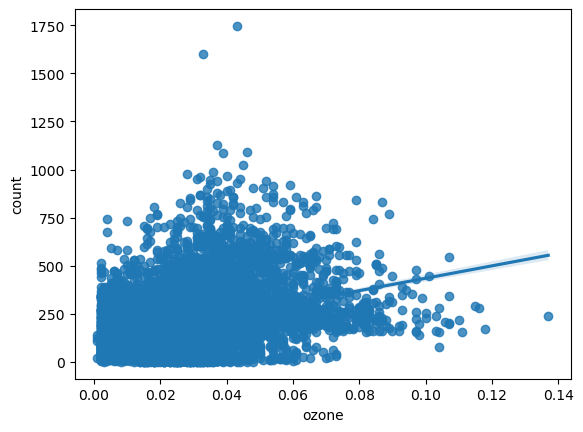

In [96]:
sns.regplot(x='ozone', y='count', data = bike_seoul)
plt.show()

2. 수치화 : 상관분석

In [97]:
spst.pearsonr(bike_seoul['ozone'], bike_seoul['count'])

PearsonRResult(statistic=0.3143357943088431, pvalue=3.025523189264917e-130)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [98]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

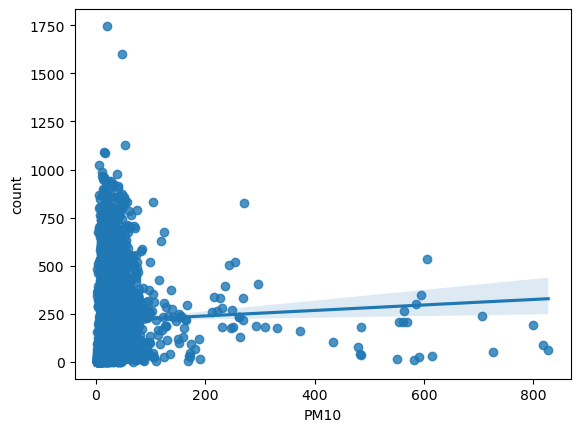

In [99]:
sns.regplot(x='PM10', y='count', data = bike_seoul)
plt.show()

2. 수치화 : 상관분석

In [100]:
spst.pearsonr(bike_seoul['PM10'], bike_seoul['count'])

PearsonRResult(statistic=0.03262773163856617, pvalue=0.014011785053987003)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [101]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

1. 시각화 : 그래프를 활용한 데이터 분석

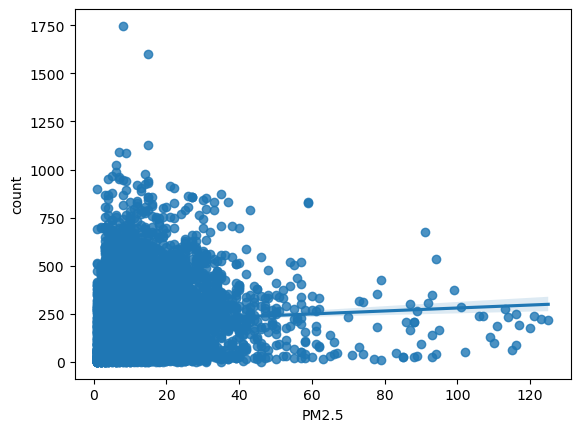

In [102]:
sns.regplot(x='PM2.5', y='count', data = bike_seoul)
plt.show()

2. 수치화 : 상관분석

In [103]:
spst.pearsonr(bike_seoul['PM2.5'], bike_seoul['count'])

PearsonRResult(statistic=0.0529237283818275, pvalue=6.690256718090878e-05)

### [Step5] 가설 검정

In [105]:
print(spst.pearsonr(bike_seoul['hour'], bike_seoul['count']))

PearsonRResult(statistic=0.587558535914158, pvalue=0.0)


#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출